In [1]:
from google.colab import files
uploaded = files.upload()


Saving CC GENERAL.csv to CC GENERAL.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [3]:
df = pd.read_csv("CC GENERAL.csv")
print("Shape:", df.shape)
df.head()


Shape: (8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
# Drop CUST_ID column (not useful for clustering)
df.drop('CUST_ID', axis=1, inplace=True)

# Handle missing values
df.dropna(inplace=True)

print("After cleaning:", df.shape)


After cleaning: (8636, 17)


In [5]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)


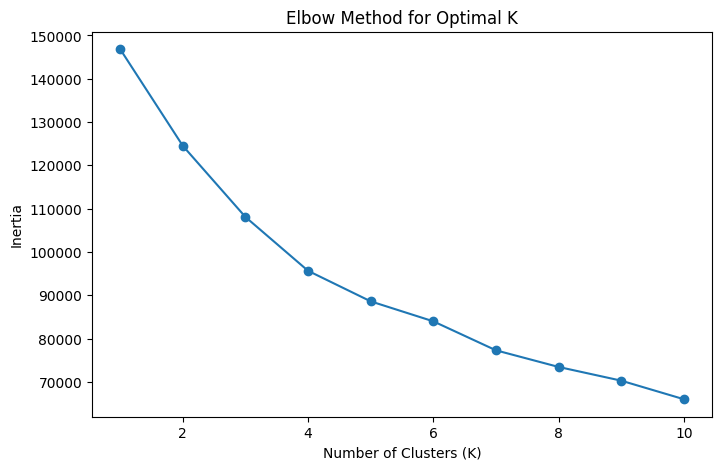

In [6]:
inertia = []
K = range(1, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_df)
    inertia.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()


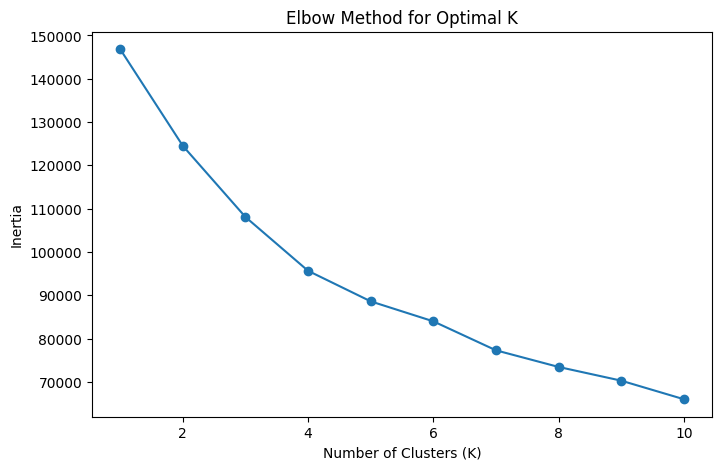

In [7]:
inertia = []
K = range(1, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_df)
    inertia.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()


In [8]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_df)

# Add cluster labels to original data
df['Cluster'] = clusters


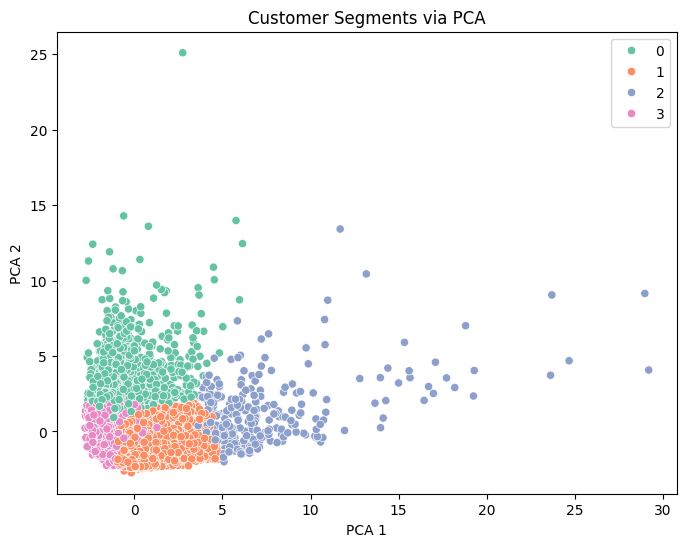

In [9]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_df)

plt.figure(figsize=(8,6))
sns.scatterplot(x=reduced_data[:,0], y=reduced_data[:,1], hue=clusters, palette="Set2")
plt.title("Customer Segments via PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


In [10]:
df.groupby('Cluster').mean()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,4652.097509,0.969074,511.046007,324.079611,187.054270,4589.613925,0.290294,0.140258,0.187624,0.487583,14.471910,7.810717,7643.089495,3565.572456,2037.471793,0.035464,11.384615
1,970.417580,0.950767,1374.131996,687.243458,687.076807,223.014367,0.894701,0.318794,0.720942,0.043822,0.821224,23.994272,4384.766431,1467.271892,665.956202,0.274339,11.624359
2,3941.953414,0.985355,8980.111024,5968.520137,3013.638669,764.360695,0.945113,0.732697,0.794027,0.079889,2.436860,99.423208,10332.593857,8588.948805,2368.704593,0.292978,11.952218
3,1052.425406,0.818274,277.900840,212.097638,66.154836,597.523951,0.181687,0.088868,0.088921,0.117719,2.180667,3.119669,3266.477987,1008.499009,569.598205,0.087591,11.470406
